<a href="https://colab.research.google.com/github/dinsor17/KKU_Data_mining/blob/master/KMeans_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Generate Data

In [60]:
from sklearn.datasets import make_blobs

In [61]:
x, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [62]:
x.shape #300แถว 2หลัก

(300, 2)

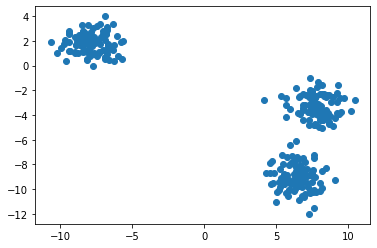

In [63]:
from matplotlib import pyplot as plt 
plt.scatter(x[:,0],x[:,1])

##Import

In [64]:
from sklearn.cluster import KMeans

##Define

In [65]:
KMclust = KMeans(n_clusters=5)

##Train

In [66]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

In [ ]:
label = KMclust.predict(x)

In [ ]:
plt.scatter(x[:,0], x[:,1], c=label)

##Color quantization (application of kmea)

In [69]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import cv2
import os

In [71]:
img = cv2.imread(os.path.join(path,'98be141fff52759150148421e0dc11a2.jpg'))

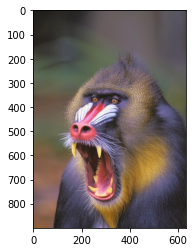

In [72]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [73]:
RGB_img.shape

(900, 632, 3)

##count unique colors

In [74]:
import numpy as np

In [75]:
np.unique(RGB_img).shape

(256,)

##Use K-mean to reduce color from 256 color to 8 colors

In [76]:
#Define
myQuantize = KMeans(n_clusters=8)

In [77]:
img_row = np.reshape(RGB_img,(900*632, 3))
img_row

array([[30, 29, 24],
       [30, 29, 24],
       [30, 29, 24],
       ...,
       [36, 32, 29],
       [35, 31, 28],
       [42, 38, 35]], dtype=uint8)

In [78]:
#Tranin
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
#Predict
res = myQuantize.predict(img_row)
res

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

##Get cluster centers

In [80]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 47.84976802,  43.23775936,  43.47299875],
       [ 98.9342819 ,  94.4433881 ,  90.79159161],
       [229.33224816, 213.30276253, 224.47669984],
       [130.5369204 , 110.95506394, 122.81970353],
       [197.24914766, 155.06083794, 152.67690734],
       [134.18474736,  95.02211844,  67.32112279],
       [ 73.09180631,  69.47007112,  77.36645198],
       [179.80421383, 126.17636072,  80.83888079]])

In [81]:
Clus_cen.shape

(8, 3)

##Map color name back to image

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [84]:
new_img_= new_img/255

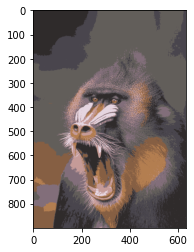

In [85]:
plt.imshow(new_img_)